In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
ELECTRON_CHARGE = 1.6e-19 # electron charge [C]
EPSILON_0 = 8.854e-12 # permittivity of vacuum [F/m]
BOLTZMANN_CONST = 1.38e-23 #[kg m2/s2/K]
ELECTRON_MASS = 9.11e-31 #[kg]
POSITIVE_ION_MASS = 32*1.67e-27 #[kg]
NEGATIVE_ION_MASS = 32*1.67e-27 #[kg]
K_REC = 1.4e-7 # Reaction rate (recombination) [cm3/s]

CHAMBER_LENGTH = 19 #[cm]
NEUTRAL_PRESSURE = 25e-3 #[Torr]
POSITIVE_ION_MFP = 1/(330*NEUTRAL_PRESSURE) # Ion-neutral MFP [cm]
NEGATIVE_ION_MFP = 1/(330*NEUTRAL_PRESSURE) # Ion-neutral MFP [cm]

In [8]:
ne = 1e9 #[cm-3]
Te = 3 #[eV]
Tp = 0.054 #[eV]
Tm = 0.054 #[eV]

v_p = np.sqrt((8*ELECTRON_CHARGE*Tp)/(np.pi*POSITIVE_ION_MASS))*1e2 #[cm/s]
v_m = np.sqrt((8*ELECTRON_CHARGE*Tm)/(np.pi*NEGATIVE_ION_MASS))*1e2 #[cm/s]
D_p = np.pi*v_p*POSITIVE_ION_MFP/8 # Positive ion diffusion coefficient [cm2/s]
D_m = np.pi*v_p*NEGATIVE_ION_MFP/8 # Negative ion diffusion coefficient [cm2/s]

eta = 2*Tp/(Tp+Tm)
gamma_m = Te/Tm
gamma_p = Te/Tp
lp = CHAMBER_LENGTH/2
n_star = 15/56*np.sqrt((8*ELECTRON_CHARGE*Tp)/(np.pi*POSITIVE_ION_MASS))*1e2*((eta**2)/(K_REC*POSITIVE_ION_MFP))

In [38]:
def h_factor_a(nm, ne):
    h_l0 = 0.86/np.sqrt(3 + eta*(lp/POSITIVE_ION_MFP))
    return h_l0*(1/(1 + nm/ne))

def h_factor_b(nm, ne):
    h_inf = 1/(np.sqrt(gamma_m) + np.sqrt(gamma_p)*(eta/(np.sqrt(2*np.pi))*(lp/POSITIVE_ION_MFP)))
    return h_inf*((nm/ne)/(1 + nm/ne))

def h_factor_c(nm, ne):
    return 1/(np.sqrt(gamma_m) + np.sqrt(gamma_p)*(np.sqrt(n_star/nm)))

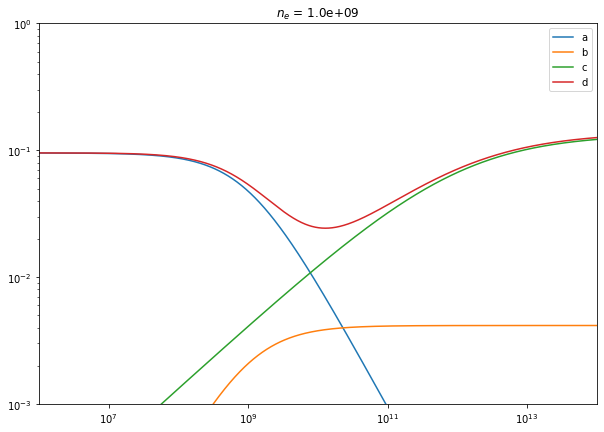

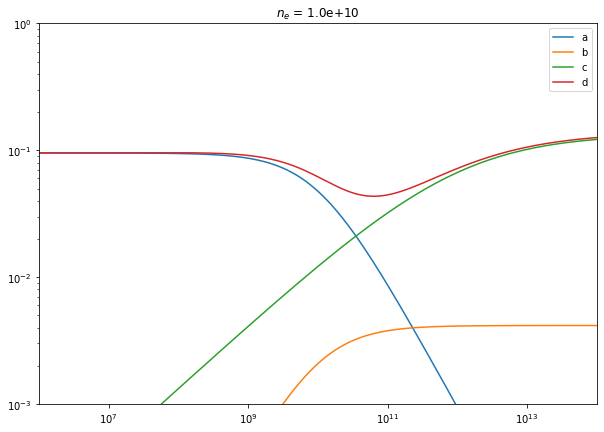

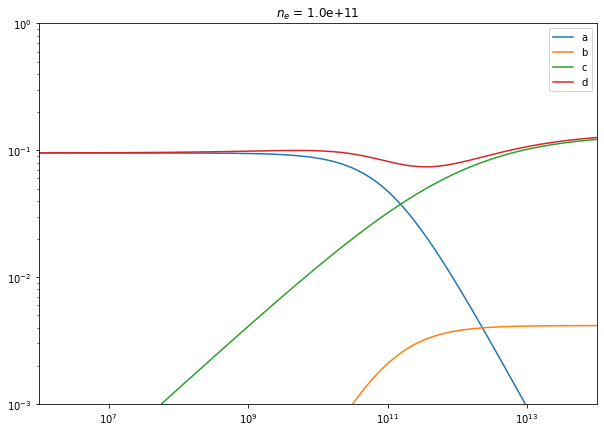

In [39]:
ne_list = [1e9, 1e10, 1e11]
for ne in ne_list:
    nm_range = np.logspace(6,14,1000)

    a_result = np.array(list(map(lambda nm:h_factor_a(nm, ne), nm_range)))
    b_result = np.array(list(map(lambda nm:h_factor_b(nm, ne), nm_range)))
    c_result = np.array(list(map(lambda nm:h_factor_c(nm, ne), nm_range)))
    d_result = a_result + b_result + c_result
    plt.figure(figsize=(10,7))
    plt.title('$n_e$ = {:1.1e}'.format(ne))
    plt.plot(nm_range, a_result)
    plt.plot(nm_range, b_result)
    plt.plot(nm_range, c_result)
    plt.plot(nm_range, d_result)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlim(1e6,1e14)
    plt.ylim(1e-3,1e0)
    plt.legend(['a','b','c','d'])